<a href="https://colab.research.google.com/github/deemanth-05/Texas_Salary_Prediction/blob/main/Texas_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **LIBRARIES**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/sample_data/salary.csv')

In [4]:
df.shape

(17549, 21)

In [5]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717.0,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717.0,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115.0,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115.0,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030.0,True,1.0,NaN,NaN,NaN


In [6]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
17544,405,DEPARTMENT OF PUBLIC SAFETY ...,BADILLO,ELIEZER,,9928,TROOPER ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,5795.08,69540.96,26371.0,NaN,NaN,NaN,NaN,NaN
17545,405,DEPARTMENT OF PUBLIC SAFETY ...,BAEZ,MARIA,I,0172,LICENSE AND PERMIT SPEC III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,3586.72,43040.64,1142629.0,NaN,NaN,NaN,NaN,NaN
17546,405,DEPARTMENT OF PUBLIC SAFETY ...,BAGE,DEBBIE,,0243,PROGRAMMER III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,6208.71,74504.52,4589.0,NaN,NaN,NaN,NaN,NaN
17547,405,DEPARTMENT OF PUBLIC SAFETY ...,BAGGETT,STEPHEN,C,9940,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,7207.91,86494.92,43833.0,NaN,NaN,NaN,NaN,NaN
17548,405,DEPARTMENT OF PUBLIC SAFETY ...,BAGGETT JR,HULON,D,9928,TROOPER ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [8]:
df.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER               float64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [17]:
df.rename({'AGENCY NAME': 'AGENCY_NAME', 'LAST NAME': 'LAST_NAME', 'FIRST NAME': 'FIRST_NAME', 'CLASS CODE': 'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE','HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER'}, axis=1,inplace=True)
df

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,...,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717.0,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717.0,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115.0,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115.0,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030.0,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17544,405,DEPARTMENT OF PUBLIC SAFETY ...,BADILLO,ELIEZER,,9928,TROOPER ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5795.08,69540.96,26371.0,NaN,NaN,NaN,NaN,NaN
17545,405,DEPARTMENT OF PUBLIC SAFETY ...,BAEZ,MARIA,I,0172,LICENSE AND PERMIT SPEC III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3586.72,43040.64,1142629.0,NaN,NaN,NaN,NaN,NaN
17546,405,DEPARTMENT OF PUBLIC SAFETY ...,BAGE,DEBBIE,,0243,PROGRAMMER III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,6208.71,74504.52,4589.0,NaN,NaN,NaN,NaN,NaN
17547,405,DEPARTMENT OF PUBLIC SAFETY ...,BAGGETT,STEPHEN,C,9940,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,7207.91,86494.92,43833.0,NaN,NaN,NaN,NaN,NaN


In [35]:
df1 = df[['AGENCY_NAME','CLASS_TITLE','ETHNICITY','GENDER','STATUS','HRLY_RATE','HRS_PER_WK','MONTHLY','ANNUAL', 'STATE_NUMBER']]
df1

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,127717.0
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,127717.0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,59115.0
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,59115.0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,165030.0
...,...,...,...,...,...,...,...,...,...,...
17544,DEPARTMENT OF PUBLIC SAFETY ...,TROOPER ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5795.08,69540.96,26371.0
17545,DEPARTMENT OF PUBLIC SAFETY ...,LICENSE AND PERMIT SPEC III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3586.72,43040.64,1142629.0
17546,DEPARTMENT OF PUBLIC SAFETY ...,PROGRAMMER III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,6208.71,74504.52,4589.0
17547,DEPARTMENT OF PUBLIC SAFETY ...,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,7207.91,86494.92,43833.0


**UNIVARIATE ANALYSIS**

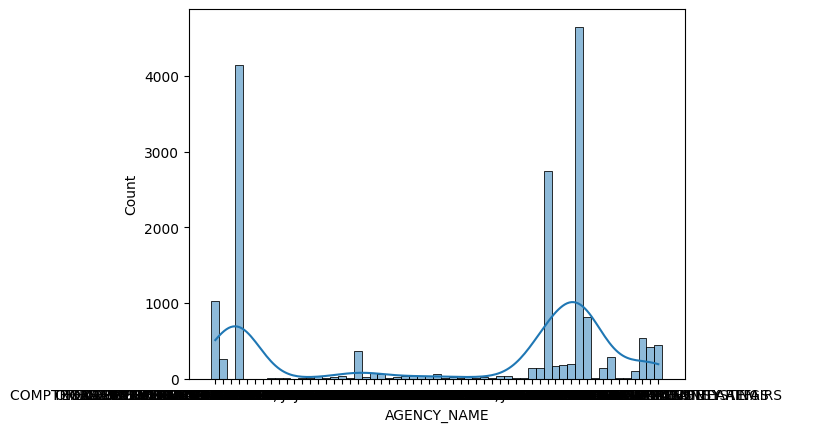

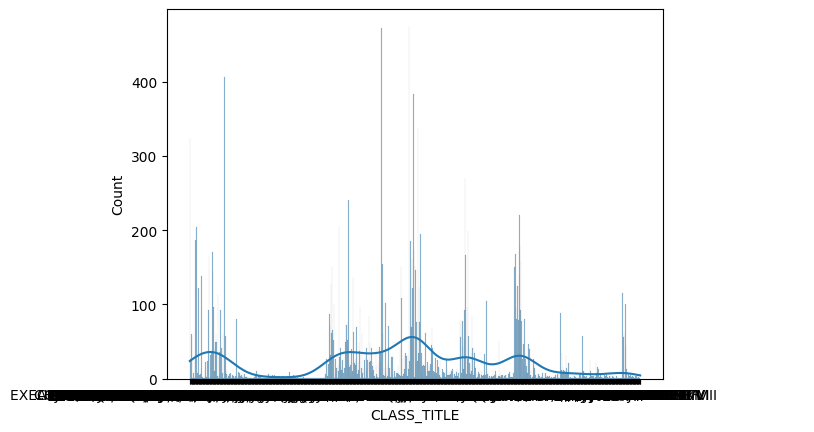

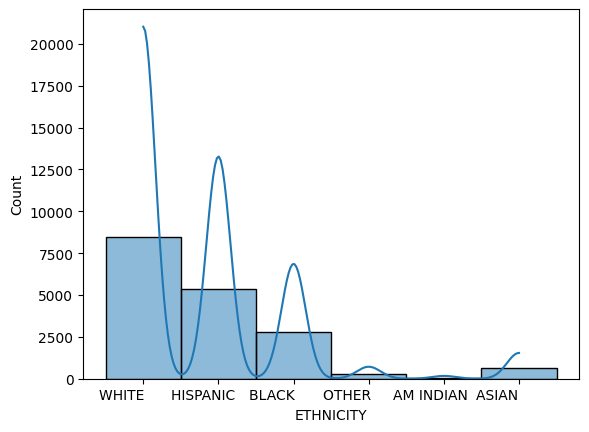

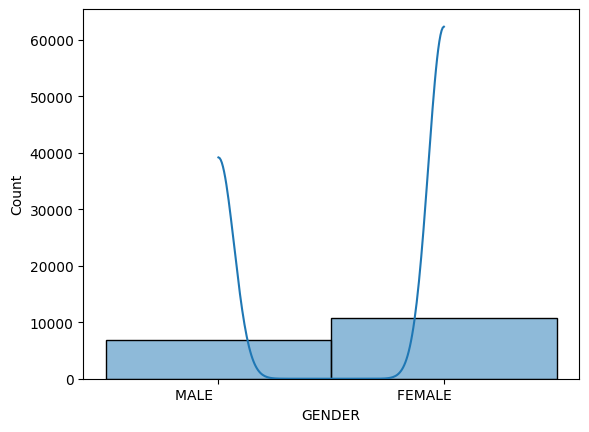

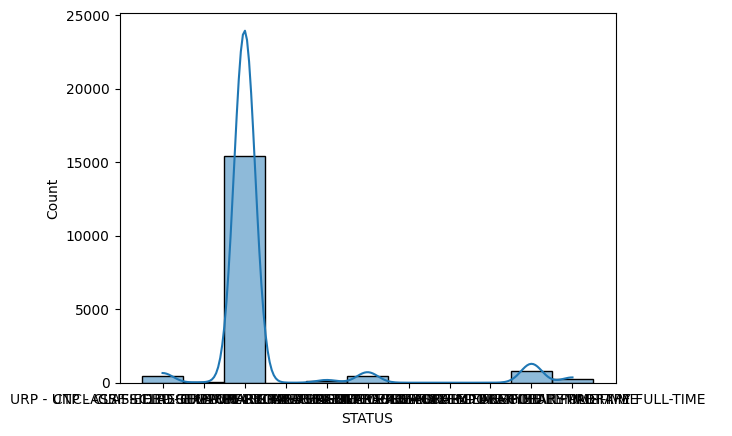

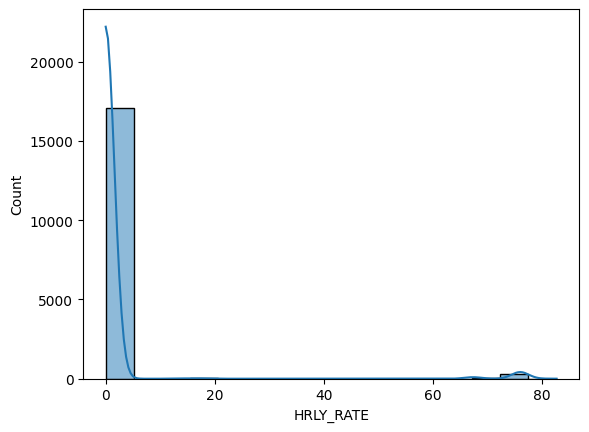

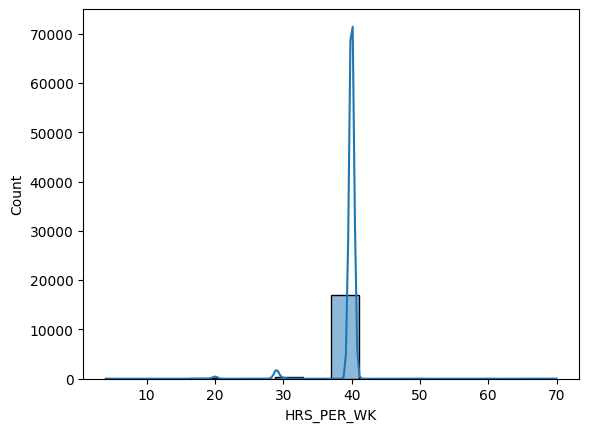

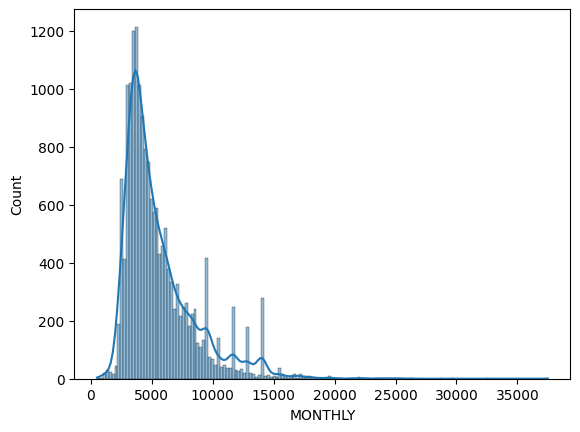

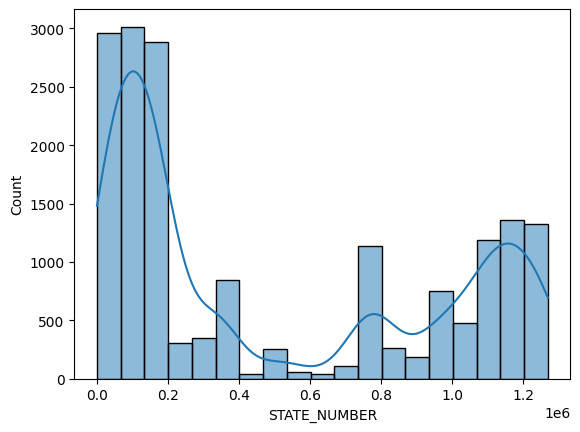

In [21]:
for columns in df1:
  sns.histplot(x=columns, data = df1, kde=True)
  plt.show()

**BIVARIATE ANALYSIS**

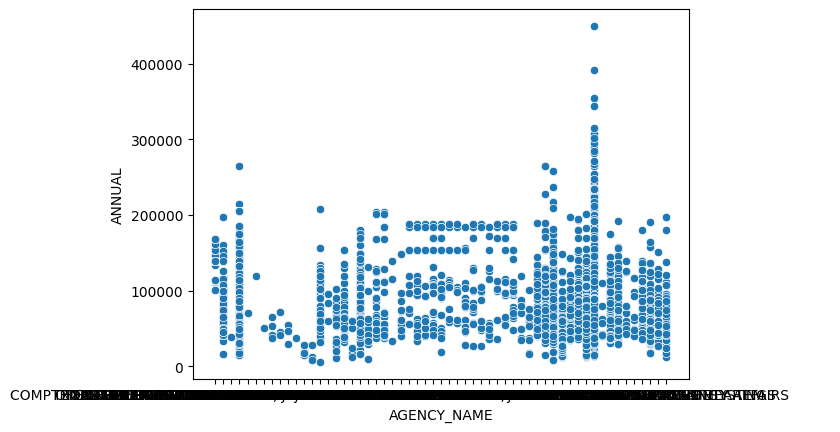

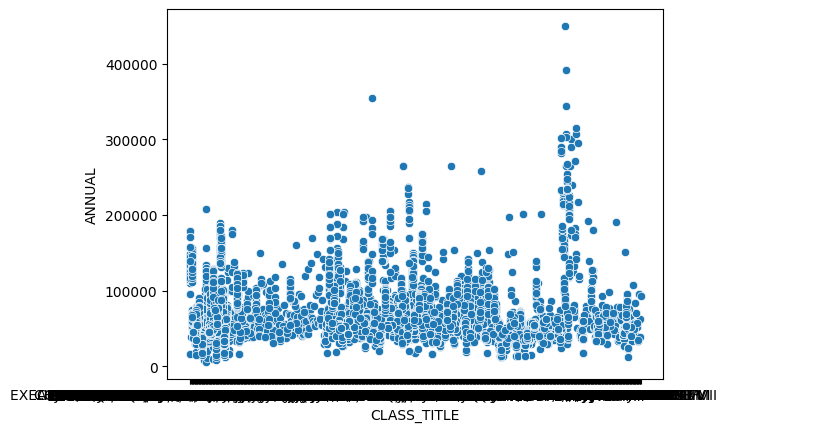

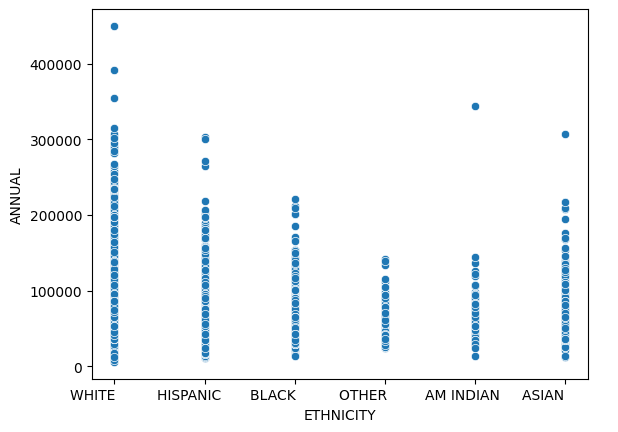

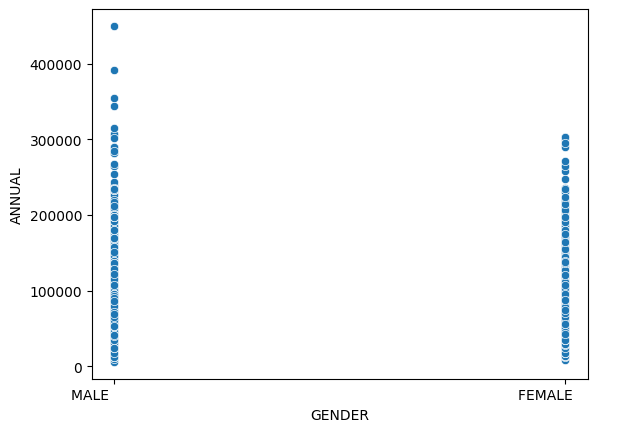

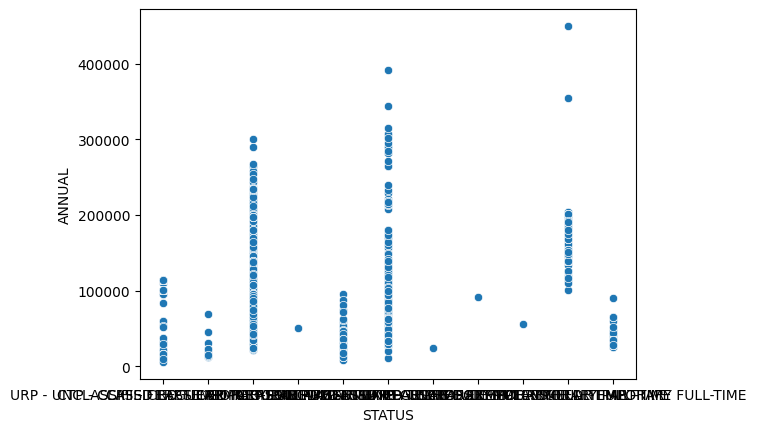

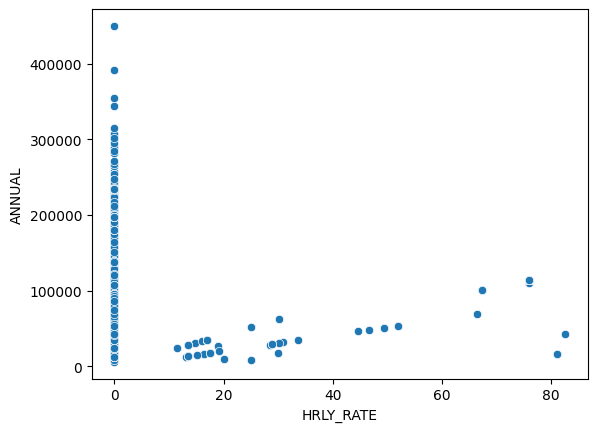

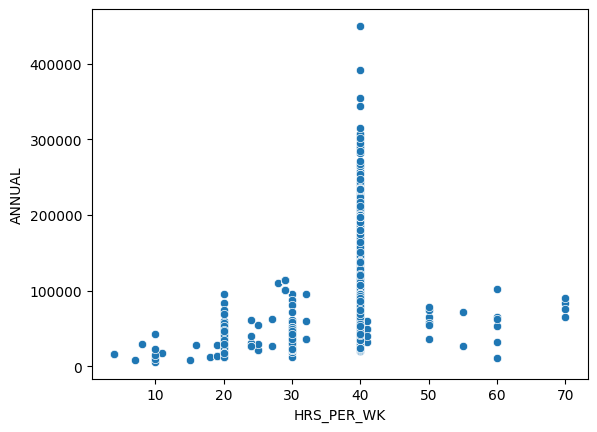

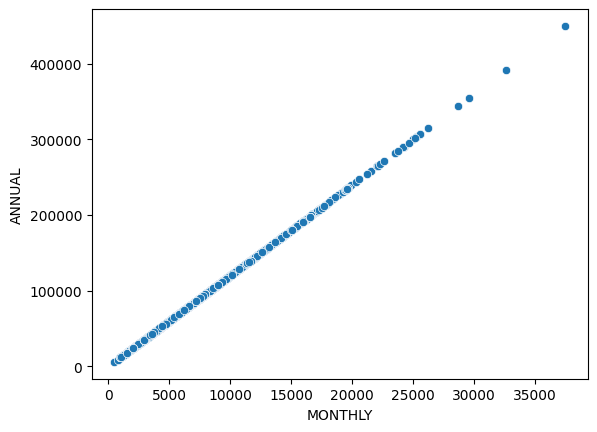

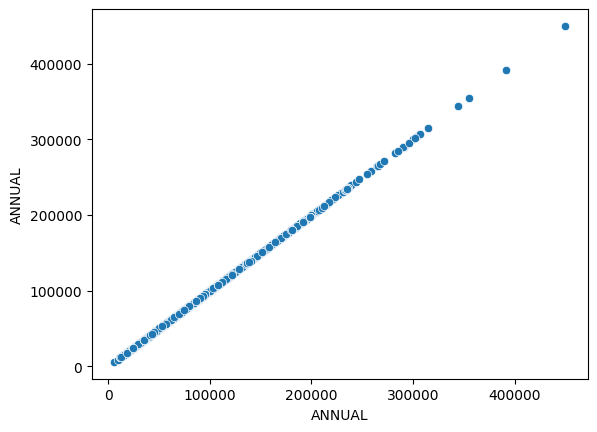

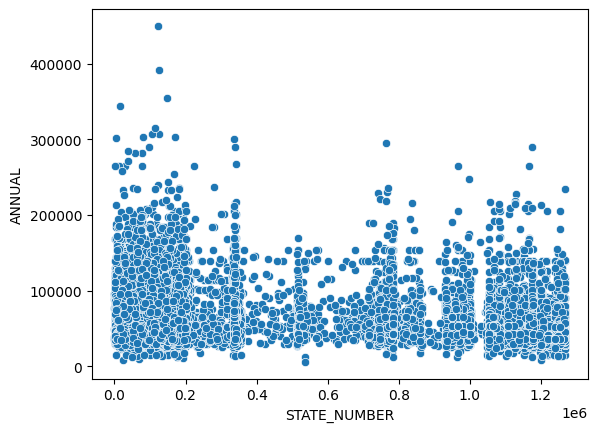

In [36]:
for columns in df1:
  sns.scatterplot(x=columns, y=df1.ANNUAL, data=df1)
  plt.show()

In [40]:
df1.loc[df1['ANNUAL'] > 400000]

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
14793,TEACHER RETIREMENT SYSTEM ...,CHIEF INVESTMENT OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,0.0,40.0,37500.0,450000.0,121522.0


In [48]:
df1.loc[df1['ANNUAL'] > 300000]

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
14793,TEACHER RETIREMENT SYSTEM ...,CHIEF INVESTMENT OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,0.0,40.0,37500.00,450000.00,121522.0
14800,TEACHER RETIREMENT SYSTEM ...,SENIOR MANAGING DIRECTOR ...,ASIAN,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,25583.33,306999.96,125360.0
14814,TEACHER RETIREMENT SYSTEM ...,SENIOR MANAGING DIRECTOR ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,25250.00,303000.00,80175.0
15041,TEACHER RETIREMENT SYSTEM ...,EXECUTIVE DIRECTOR ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,0.0,40.0,29595.12,355141.44,147935.0
15078,TEACHER RETIREMENT SYSTEM ...,SENIOR MANAGING DIRECTOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,25250.00,303000.00,171322.0
15154,TEACHER RETIREMENT SYSTEM ...,SENIOR MANAGING DIRECTOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,32666.66,391999.92,124553.0
15283,TEACHER RETIREMENT SYSTEM ...,MANAGING DIRECTOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,25583.33,306999.96,106082.0
15349,TEACHER RETIREMENT SYSTEM ...,MANAGING DIRECTOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,26250.00,315000.00,113006.0
15525,TEACHER RETIREMENT SYSTEM ...,SENIOR DIRECTOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,25166.67,302000.04,5508.0
15539,TEACHER RETIREMENT SYSTEM ...,SENIOR MANAGING DIRECTOR ...,AM INDIAN,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,0.0,40.0,28666.67,344000.04,14408.0


In [51]:
df.isnull().sum()

AGENCY                         0
AGENCY_NAME                    0
LAST_NAME                      0
FIRST_NAME                     0
MI                             0
CLASS_CODE                     0
CLASS_TITLE                    0
ETHNICITY                      0
GENDER                         0
STATUS                         0
EMPLOY_DATE                    0
HRLY_RATE                      1
HRS_PER_WK                     1
MONTHLY                        1
ANNUAL                         1
STATE_NUMBER                   1
duplicated                 17406
multiple_full_time_jobs    17535
combined_multiple_jobs     17452
summed_annual_salary       17533
hide_from_search           17533
dtype: int64

In [60]:
df.columns

Index(['AGENCY_NAME', 'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS',
       'EMPLOY_DATE', 'HRLY_RATE', 'HRS_PER_WK', 'ANNUAL', 'STATE_NUMBER'],
      dtype='object')

In [65]:
df

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,114549.84,127717.0
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,16857.24,127717.0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,114549.84,59115.0
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,16857.24,59115.0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,39411.24,165030.0
...,...,...,...,...,...,...,...,...,...,...
17544,DEPARTMENT OF PUBLIC SAFETY ...,TROOPER ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,08/08/10,0.00000,40.0,69540.96,26371.0
17545,DEPARTMENT OF PUBLIC SAFETY ...,LICENSE AND PERMIT SPEC III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/15/18,0.00000,40.0,43040.64,1142629.0
17546,DEPARTMENT OF PUBLIC SAFETY ...,PROGRAMMER III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/18/90,0.00000,40.0,74504.52,4589.0
17547,DEPARTMENT OF PUBLIC SAFETY ...,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/20/98,0.00000,40.0,86494.92,43833.0


In [75]:
df.shape

(17548, 10)

In [79]:
df

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,127717.0
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,16857.24,127717.0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,59115.0
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,16857.24,59115.0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,39411.24,165030.0
...,...,...,...,...,...,...,...,...,...
17543,DEPARTMENT OF PUBLIC SAFETY ...,TROOPER ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,72612.96,187717.0
17544,DEPARTMENT OF PUBLIC SAFETY ...,TROOPER ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,69540.96,26371.0
17545,DEPARTMENT OF PUBLIC SAFETY ...,LICENSE AND PERMIT SPEC III ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,43040.64,1142629.0
17546,DEPARTMENT OF PUBLIC SAFETY ...,PROGRAMMER III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,74504.52,4589.0


**ONE HOT ENCODING**

In [80]:
df = pd.get_dummies(df,drop_first= False)
df

,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,AGENCY_NAME_BOARD OF EXAMINERS OF PSYCHOLOGISTS,AGENCY_NAME_COMPTROLLER OF PUBLIC ACCOUNTS,"AGENCY_NAME_COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",AGENCY_NAME_CT CRIM APPEALS,AGENCY_NAME_DEPARTMENT OF AGRICULTURE,AGENCY_NAME_DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES,...,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,75.96150,29.0,114549.84,127717.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,81.04454,4.0,16857.24,127717.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,75.96150,29.0,114549.84,59115.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,81.04453,4.0,16857.24,59115.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.00000,40.0,39411.24,165030.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543,0.00000,40.0,72612.96,187717.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17544,0.00000,40.0,69540.96,26371.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17545,0.00000,40.0,43040.64,1142629.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17546,0.00000,40.0,74504.52,4589.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df.shape

(17548, 853)

In [83]:
X= df.drop(['ANNUAL'],axis=1)
y=df.ANNUAL

In [85]:
X.shape

(17548, 852)

In [87]:
y.shape

(17548,)

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33)

In [89]:
X_train

,HRLY_RATE,HRS_PER_WK,STATE_NUMBER,AGENCY_NAME_BOARD OF EXAMINERS OF PSYCHOLOGISTS,AGENCY_NAME_COMPTROLLER OF PUBLIC ACCOUNTS,"AGENCY_NAME_COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION",AGENCY_NAME_CT CRIM APPEALS,AGENCY_NAME_DEPARTMENT OF AGRICULTURE,AGENCY_NAME_DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES,AGENCY_NAME_DEPARTMENT OF HOUSING AND COMMUNITY AFFAIRS,...,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
13220,0.0,40.0,4738.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3062,0.0,40.0,137604.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13629,0.0,40.0,1050890.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4444,0.0,40.0,295127.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0.0,40.0,78937.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,0.0,40.0,1176602.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0.0,40.0,768696.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
578,0.0,40.0,760732.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5848,0.0,40.0,27750.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **LINEAR REGRESSION**

In [90]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_predict = LR.predict(X_train)

In [91]:
y_train

13220     36264.00
3062      86940.00
13629     50846.88
4444      62000.04
940      100000.08
           ...    
10435     29467.68
57        90000.00
578       57952.80
5848      54807.60
2439      45999.96
Name: ANNUAL, Length: 13161, dtype: float64

In [92]:
y_predict

array([ 37363.11429611, 102133.28297146,  46869.8996201 , ...,
        59775.35310626,  52182.47213405,  46281.28906072])

In [93]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_train,y_predict)

In [94]:
r2score

0.9688635067703939

# **DECISION TREE REGRESSOR**

In [96]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [97]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_test,predictions)

In [98]:
r2score

0.8208060803463162

# **RANDOM FOREST REGRESSOR**

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [100]:
predictions = model.predict(X_test)
y_predict=regressor.predict(X_test)
r2score=r2_score(y_test,y_predict)

In [101]:
r2score

0.8691421621188028

# **KNN REGRESSOR**

In [102]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 8)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test)

In [103]:
r2score=r2_score(y_test,pred)

In [104]:
r2score

0.040338812312220806

# **CONCLUSION**



1.  LINEAR REGRESSION
    
    r2score = 0.949

2.  DECISION TREE REGRESSOR

    r2score = 0.836

3.  RANDOM FOREST REGRESSOR

    r2score = 0.875

4.  KNN REGRESSOR

    r2score = 0.040


**By comparing various regression machine learning models,we found that Linear Regression model is best suited for Texas Salary Prediction Dataset, based on the above listed r2score for respective machine learning models.**
